Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

### Note - this file is meant to LOAD from the pickle files for train, test, and validate

We focus on running the models and parameters here, rather than preping the data sets

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
data_root = '.' # Change me to store data elsewhere
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    train_dataset = pickle_data['train_dataset']
    train_labels  = pickle_data['train_labels']
    valid_dataset = pickle_data['valid_dataset']
    valid_labels  = pickle_data['valid_labels']
    test_dataset  = pickle_data['test_dataset']
    test_labels   = pickle_data['test_labels']
except Exception as e:
  print('Unable to read data from', pickle_file, ':', e)
  raise

In [3]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

train_dataset.shape

Compressed pickle size: 690800506


(200000, 28, 28)

In [4]:

def show_images(images, cols=1, titles=None):
    """Displays a list of images
    from https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None) or (len(images)==len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    print("length of images %d" % len(images))
    for n, (image, title) in enumerate(zip(images, titles)):
        #a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n+1)
        a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n+1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 2)
    #fig.set_size_inches(np.array(n_images) *3)
    plt.show()

length of images 20


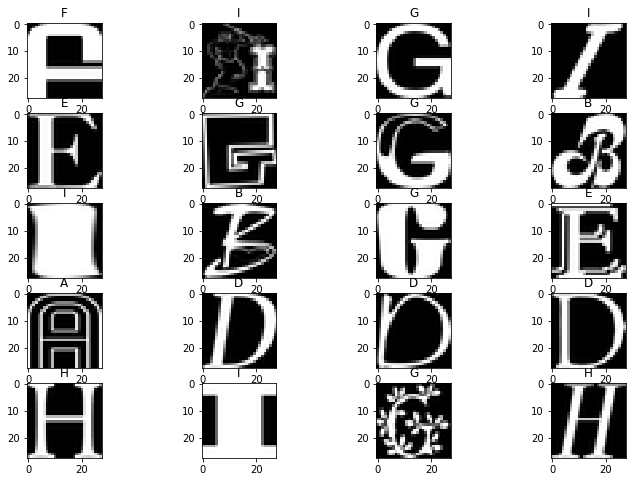

In [5]:
sample_set = random.sample(range(0,len(train_dataset)), 20) 
show_images(train_dataset[sample_set],4, list(map(chr, [x+65 for x in train_labels[sample_set]])))

length of images 20


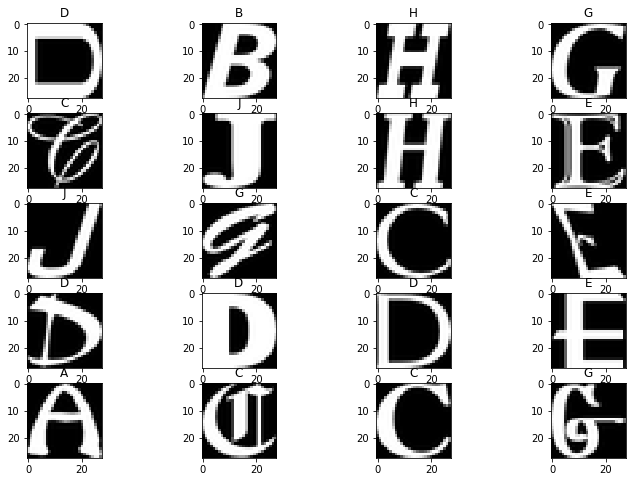

In [6]:
sample_set = random.sample(range(0,len(test_dataset)), 20) 
show_images(test_dataset[sample_set],4, list(map(chr, [x+65 for x in test_labels[sample_set]])))

length of images 20


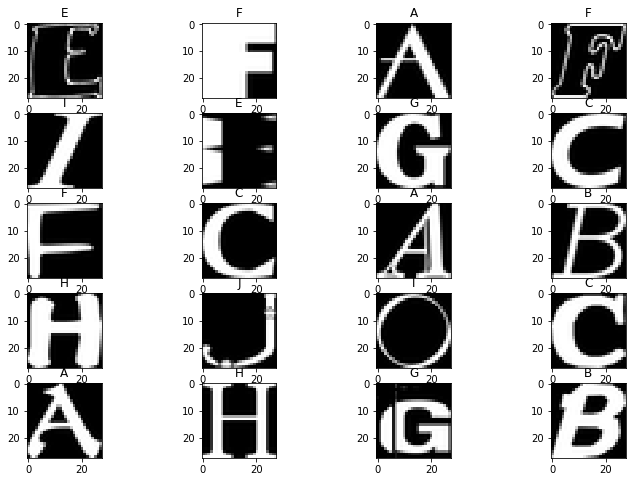

In [7]:
sample_set = random.sample(range(0,len(valid_dataset)), 20) 
show_images(valid_dataset[sample_set],4, list(map(chr, [x+65 for x in valid_labels[sample_set]])))

Finally, let's save the data for later reuse:

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [8]:
time

Wall time: 0 ns


In [9]:
# running on the main office computer this does take a while to run (several minutes, this is block #20)
# could be 200000  (takes several minutes to fit the model, and result is about 10.65% failure on 10k samples)
train_subset = 10000
train_dataset = train_dataset[:train_subset, :]
train_labels = train_labels[:train_subset]
train_dataset.shape

(10000, 28, 28)

In [10]:


from sklearn.linear_model import LogisticRegression
(n,width,height) = train_dataset.shape
X =  np.reshape(train_dataset,(n,width*height))[0:n]
(n,width,height) = test_dataset.shape
Y =  np.reshape(test_dataset,(n,width*height))[0:n]
X.shape

clf = LogisticRegression()
clf.fit(X, train_labels)
test_predicted = clf.predict(Y)



In [11]:
train_labels.shape


(10000,)

In [12]:
import pandas as pd

rows = []
num_failed=0
for i, test_l in enumerate(test_labels):
    if test_l != test_predicted[i]:
        #print("failed to predict test image # " + str(i) + ". predicted " + str(chr(test_predicted[i]+65)) + " instead of " + str(chr(test_l+65)))
        #plt.imshow(test_dataset[i, :, :],cmap='gray')
        #plt.show()
        rows.append([str(i), str(chr(test_predicted[i]+65)), str(chr(test_l+65))])
        num_failed+=1

test_size = len(test_labels)
print("total failed %.2f%% out of %d" % (float(num_failed)/float(test_size)*100.0, test_size))

testresults = pd.DataFrame(rows, columns=['ImageNum', 'predicted', 'actual'])

testresults.groupby(['predicted', 'actual']).size().unstack()

total failed 15.51% out of 10000


actual,A,B,C,D,E,F,G,H,I,J
predicted,,,,,,,,,,
A,NaN,12.0,6.0,10.0,14.0,17.0,16.0,29.0,18.0,24.0
B,19.0,NaN,7.0,22.0,32.0,16.0,13.0,22.0,9.0,4.0
C,12.0,15.0,NaN,14.0,45.0,15.0,35.0,12.0,16.0,16.0
D,9.0,36.0,7.0,NaN,9.0,7.0,19.0,12.0,11.0,19.0
E,9.0,21.0,33.0,14.0,NaN,13.0,10.0,12.0,14.0,10.0
F,6.0,16.0,15.0,15.0,29.0,NaN,19.0,32.0,18.0,19.0
G,8.0,16.0,32.0,8.0,17.0,9.0,NaN,11.0,13.0,10.0
H,51.0,17.0,2.0,10.0,16.0,11.0,10.0,NaN,17.0,6.0
I,17.0,20.0,16.0,18.0,47.0,23.0,10.0,15.0,NaN,33.0


In [13]:
import pandas as pd
df = pd.DataFrame(data={'col1': ['F','H', 'F'], 'col2' : [ 'H', 'B', 'C']})
df.apply(pd.value_counts)
df.groupby(['col1', 'col2']).size().unstack()


col2,B,C,H
col1,,,
F,NaN,1.0,1.0
H,1.0,NaN,NaN
